In [1]:
### 000 CONFIGURACION GENERAL
# -------------------------------
# CONFIGURACIÓN GENERAL
# -------------------------------
TIPO_ESTRUCTURA = "Suspensión Recta" # Tipos: "Suspensión Recta", "Suspensión angular", "Retención / Ret. Angular", "Terminal"
exposicion = "C" # Exposiciones B, C, D
clase = "C"  # Clase de linea según AEA, dependiendo de tensión e importancia (A, B, BB, C, D, E)
TITULO = f"2x220 DTT SAN JORGE PRUEBAS" # String para nombre de carpeta con datos a guardarse

# Guardado (autoconfig, no input de usuario)
tipoestructura_nombre_archivo = f"{TIPO_ESTRUCTURA.replace(' ', '_').replace('ó','o').replace('/','_').lower()}" 
folder = f"{TITULO}/{tipoestructura_nombre_archivo}"

# ================= PARÁMETROS DE DISEÑO DE LINEA =================
L_vano = 400.0 # m
alpha = 0.0  # grados, angulo max de quiebre
theta = 45.0 # grados, angulo de viento oblicuo, respecto transversal
A_cadena = 0.03  # m²
PCADENA = 10.5 # daN
PESTRUCTURA = 3900 # daN
A_estr_trans = 2 * 15 * (0.4 + 0.4 + 14.8 * 0.015) / 2 #+ 2 * 0.3 # m² # sumo 2 vinculos
A_estr_long = A_estr_trans + 3 * 0.5  # m², sumo 3 crucetas 

# Tomamos nombres de archivo DatosCables.py (se leen los campos para ver que cables disponibles hay)
cable_conductor_id = "AlAc 435/55"  
cable_guardia_id = "OPGW FiberHome 24FO 58mm2"

# Parámetros del viento y temperatura
Zona_climatica = "D" # Zonas climáticas AEA: A,B,C,D,E
Vmax = 38.9 # m/s
Vmed = 0.4 * Vmax # por defecto, pero permite añadir valor numerico
Vtormenta = 20.0
t_hielo = 0.010 # m, espesor manguito de hielo
Q = 0.0613      # coef. depende de densidad del aire, 0.0613 por defecto
Zco, Zcg, Zca, Zes = 13.0, 13.0, 13.0, 10.0 # alturas efectivas de conductor, guardia, cadena, estructura
Cf_cable, Cf_guardia, Cf_cadena, Cf_estructura = 1.0, 1.0, 0.9, 0.9 # Coeficientes de arrastre de conductor, guardia cadena, estructura, rango 0.9 a 2

# ================= CONFIGURACIÓN SELECCIÓN DE POSTES =================
FORZAR_N_POSTES = 1  # 0=auto, 1=monoposte, 2=biposte, 3=triposte
FORZAR_ORIENTACION = "No" # Opciones: "Longitudinal", "Transversal", "No"
PRIORIDAD_DIMENSIONADO = "altura_libre" #(altura_libre: aumenta la long total manteniendo la altura libre fija; longitud_total: mantiene la longitud total fija y varia la altura libre)

# ================= CONFIGURACIÓN DISEÑO DE CABEZAL =================
TENSION = 220 
Zona_estructura = "Rural"   # ver opciones:         "Peatonal": 4.70, "Rural": 5.90, "Urbana": 8.38, "Autopista": 7.00, "Ferrocarril": 8.50, "Línea Eléctrica": 1.20
Lk = 2.5 # 0.75 # altura adicional, long. cadena oscilante
ANG_APANTALLAMIENTO = 30.0  # Ángulo de apantallamiento en grados

# Altura sobre el nivel del mar
AJUSTAR_POR_ALTURA_MSNM = True  # Ajustar por alta montaña
METODO_ALTURA_MSNM = "AEA 3%/300m" # Disponibles: "AEA 3%/300m"
Altura_MSNM = 3000

# Disposición de conductores, cantidad de guardia
DISPOSICION = "triangular" # DISPOSICION: triangular, horizontal, vertical
TERNA = "Doble" # Simple, Doble
CANT_HG = 2 # 0, 1, 2
HG_CENTRADO = False  # True: cable guardia centrado, False: cable guardia en extremo (1 solo hg)

# Dimensiones mínimas y adicionales
ALTURA_MINIMA_CABLE= 6.5
LONGITUD_MENSULA_MINIMA_CONDUCTOR = 1.3
LONGITUD_MENSULA_MINIMA_GUARDIA = 0.2
HADD = 0.4 ## Hadd = 0.4 m a la S base, 0.4 a la RA35dt, 0.9 a la Tdt+0.5
HADD_ENTRE_AMARRES = 0.2
HADD_HG = 1.5  # Altura adicional para cable guardia
HADD_LMEN = 0.5  # Altura adicional para longitud de ménsula
ANCHO_CRUCETA = 0.3 # m. ancho adicional para evitar que el conductor de segundo nivel se acerque demasiado a la estructura debajo

# Autoajuste optimizado de longitud de mensula de cable de guardia
AUTOAJUSTAR_LMENHG = True # Si es True, se aplica algoritmo de alargamiento / acortamiento de brazo de cable de guardia "lmenhg" para apantallamiento óptimo
DIST_REPOSICIONAR_HG = 0.1  # ← NUEVA VARIABLE: Distancia para reposicionar HG (m) (si sobra cobertura mas que este valor)

# Configuración para mostrar/ocultar hipótesis C2 en graficos de reacciones
MOSTRAR_C2 = False

# ================= CONFIGURACIÓN DE FLECHADO / CÁLCULO MÉCANICO =================
SALTO_PORCENTUAL, PASO_AFINADO = 0.05, 0.005
OBJ_CONDUCTOR, OBJ_GUARDIA = 'FlechaMin', 'TiroMin' # Disponibles: 'FlechaMin', 'TiroMin'
RELFLECHA_MAX_GUARDIA = 0.95
RELFLECHA_SIN_VIENTO = True  # Solo considera los estados sin viento para la relación de flecha

restricciones = {
    "conductor": {"tension_max_porcentaje": {"I": 0.25, "II": 0.40, "III": 0.40, "IV": 0.40, "V": 0.25}},
    "guardia": {"tension_max_porcentaje": {"I": 0.7, "II": 0.70, "III": 0.70, "IV": 0.7, "V": 0.7}, "relflecha_max": RELFLECHA_MAX_GUARDIA}
}

estados_climaticos = {
    "I": {"temperatura": 35, "descripcion": "Tmáx", "viento_velocidad": 0, "espesor_hielo": 0},
    "II": {"temperatura": -20, "descripcion": "Tmín", "viento_velocidad": 0, "espesor_hielo": 0},
    "III": {"temperatura": 10, "descripcion": "Vmáx", "viento_velocidad": Vmax, "espesor_hielo": 0},
    "IV": {"temperatura": -5, "descripcion": "Vmed", "viento_velocidad": Vmed, "espesor_hielo": t_hielo},
    "V": {"temperatura": 8, "descripcion": "TMA", "viento_velocidad": 0, "espesor_hielo": 0}
}

# ================= CONFIGURACIÓN GRÁFICOS =================
ZOOM_CABEZAL = 0.95
REEMPLAZAR_TITULO_GRAFICO = False
TITULO_REEMPLAZO = TITULO if REEMPLAZAR_TITULO_GRAFICO else TIPO_ESTRUCTURA
MOSTRAR_C2 = False

## Automaticas
Vn = TENSION

"""
NOTAS 
#####
- Se deben separar TOP e HG para permitir el HG 0.125 m mas bajo en retenciones y 0.135 m mas alto en suspensión, y defasaje longitudinal de 0.45
- Se debe añadir la opcion de agregar nodos y tramos manuales, y cargas de tiro, viento, peso a esos nodos, para estructuras especiales"
"""

'\nNOTAS \n#####\n- Se deben separar TOP e HG para permitir el HG 0.125 m mas bajo en retenciones y 0.135 m mas alto en suspensión, y defasaje longitudinal de 0.45\n- Se debe añadir la opcion de agregar nodos y tramos manuales, y cargas de tiro, viento, peso a esos nodos, para estructuras especiales"\n'

In [2]:
### 001 IMPORTS PROPIOS
from CalculoCables import Cable_AEA, Elemento_AEA, LibCables    # Funciones de cálculo de cables
from DatosCables import datos_cables                            # Datos de cables para LibCables

from EstructuraAEA_Geometria import EstructuraAEA_Geometria, NodoEstructural
from EstructuraAEA_Mecanica import EstructuraAEA_Mecanica
from EstructuraAEA_Graficos import EstructuraAEA_Graficos

from HipotesisMaestro import hipotesis_maestro                  # Hipotesis de carga para CalculoEstructura

from PostesHormigon import PostesHormigon                       # Librería de postes de hormigón (longitud / peso / resistencia / diametro en cima)
from Estructura3D import Estructura3D                           # Clase para graficar

from ListarCargas import ListadorCargas                         # Módulo para generar listado de cargas


In [3]:
### 002 CREAR OBJETOS CABLE, CADENA, ESTRUCTURA
# Datos de cables (de la celda 002 original)
DATOS_CABLES = datos_cables

# Verificar que los cables que necesitamos existen en la base de datos
if cable_conductor_id not in DATOS_CABLES:
    raise ValueError(f"ERROR: Cable conductor '{cable_conductor_id}' no encontrado en DATOS_CABLES")
if cable_guardia_id not in DATOS_CABLES:
    raise ValueError(f"ERROR: Cable guardia '{cable_guardia_id}' no encontrado en DATOS_CABLES")

# Parámetros de viento base COMPLETOS
viento_base_params_conductor = {
    'V': Vmax,
    't_hielo': t_hielo,
    'exp': exposicion,
    'clase': clase,
    'Zc': Zco,
    'Cf': Cf_cable,
    'L_vano': L_vano
}

viento_base_params_guardia = {
    'V': Vmax,
    't_hielo': t_hielo,
    'exp': exposicion,
    'clase': clase,
    'Zc': Zcg,
    'Cf': Cf_guardia,
    'L_vano': L_vano
}

# Crear lib de cables
lib_cables = LibCables()

# 1. Crear cable conductor
cable_conductor = Cable_AEA(
    id_cable=cable_conductor_id,
    nombre=cable_conductor_id,
    propiedades=DATOS_CABLES[cable_conductor_id],
    viento_base_params=viento_base_params_conductor  # ← OBLIGATORIO
)
lib_cables.agregar_cable(cable_conductor)
print(f"✅ Cable CONDUCTOR creado: {cable_conductor.nombre}")

# 2. Crear cable guardia
cable_guardia = Cable_AEA(
    id_cable=cable_guardia_id,
    nombre=cable_guardia_id,
    propiedades=DATOS_CABLES[cable_guardia_id],
    viento_base_params=viento_base_params_guardia  # ← OBLIGATORIO
)
lib_cables.agregar_cable(cable_guardia)
print(f"✅ Cable GUARDIA creado: {cable_guardia.nombre}")

# Crear objetos cadena y estructura basados en la configuración
cadena = Elemento_AEA(
    id_elemento="cadena_aisladores",
    nombre="Cadena de Aisladores",
    area_transversal_m2=A_cadena,
    area_longitudinal_m2=A_cadena,  # Misma área en ambos sentidos
    Cf=Cf_cadena,
    Z=Zca,
    peso_daN=PCADENA
)

estructura = Elemento_AEA(
    id_elemento="estructura",
    nombre="Estructura",
    area_transversal_m2=A_estr_trans,
    area_longitudinal_m2=A_estr_long,  # Diferentes áreas
    Cf=Cf_estructura,
    Z=Zes,
    peso_daN=PESTRUCTURA
)

print("✅ OBJETOS Elemento_AEA CREADOS EXITOSAMENTE")
print("=" * 60)
print(f"Cadena: {cadena}")
print(f"Estructura: {estructura}")

# Variables globales para compatibilidad con celdas existentes
cable_conductor_obj = cable_conductor  
cable_guardia_obj = cable_guardia      

print(f"\n🔗 VARIABLES DE COMPATIBILIDAD:")
print(f"   - cable_conductor_obj: {cable_conductor_obj.nombre}")
print(f"   - cable_guardia_obj: {cable_guardia_obj.nombre}")

✅ Cable CONDUCTOR creado: AlAc 435/55
✅ Cable GUARDIA creado: OPGW FiberHome 24FO 58mm2
✅ OBJETOS Elemento_AEA CREADOS EXITOSAMENTE
Cadena: Elemento cadena_aisladores: Cadena de Aisladores - A_trans: 0.030m², A_long: 0.030m²
Estructura: Elemento estructura: Estructura - A_trans: 15.330m², A_long: 16.830m²

🔗 VARIABLES DE COMPATIBILIDAD:
   - cable_conductor_obj: AlAc 435/55
   - cable_guardia_obj: OPGW FiberHome 24FO 58mm2


In [4]:
### 003 CMC Y CARGAS
import pandas as pd
import math
import os

print("🔧 INICIANDO CÁLCULO COMPLETO OPTIMIZADO")
print("=" * 60)
print(f"Estructura: {TIPO_ESTRUCTURA}")
print(f"Conductor: {cable_conductor.nombre}")
print(f"Guardia: {cable_guardia.nombre}")
print(f"Vano: {L_vano} m")
print(f"Vmax: {Vmax} m/s, Vmed: {Vmed:.1f} m/s")

# ================= CÁLCULO MECÁNICO DE CABLES =================
print("\n🔧 CALCULANDO CÁLCULO MECÁNICO DE CABLES...")

parametros_viento = {"exposicion": exposicion, "clase": clase, "Zc": Zco, "Cf": Cf_cable, "L_vano": L_vano}
parametros_viento_guardia = {**parametros_viento, "Zc": Zcg, "Cf": Cf_guardia}

print("🔧 CALCULANDO CONDUCTOR...")
df_conductor, resultados_conductor, estado_limitante_cond = cable_conductor.calculo_mecanico(
    vano=L_vano, estados_climaticos=estados_climaticos, parametros_viento=parametros_viento,
    restricciones=restricciones["conductor"], objetivo=OBJ_CONDUCTOR, es_guardia=False,
    flecha_max_permitida=3.0, salto_porcentual=SALTO_PORCENTUAL, paso_afinado=PASO_AFINADO, 
    relflecha_sin_viento=RELFLECHA_SIN_VIENTO
)

print("✅ CONDUCTOR COMPLETADO")
for col in df_conductor.columns:
    if df_conductor[col].dtype == 'float64':
        df_conductor[col] = df_conductor[col].round(2)
display(df_conductor)

# Calcular guardia
flecha_max_conductor = max([r["flecha_vertical_m"] for r in resultados_conductor.values()])
flecha_max_guardia = flecha_max_conductor * RELFLECHA_MAX_GUARDIA

print("🔧 CALCULANDO GUARDIA...")
df_guardia, resultados_guardia, estado_limitante_guard = cable_guardia.calculo_mecanico(
    vano=L_vano, estados_climaticos=estados_climaticos, parametros_viento=parametros_viento_guardia,
    restricciones=restricciones["guardia"], objetivo=OBJ_GUARDIA, es_guardia=True,
    flecha_max_permitida=flecha_max_guardia, resultados_conductor=resultados_conductor,
    salto_porcentual=SALTO_PORCENTUAL, paso_afinado=PASO_AFINADO, relflecha_sin_viento=RELFLECHA_SIN_VIENTO
)

print("✅ GUARDIA COMPLETADO")
for col in df_guardia.columns:
    if df_guardia[col].dtype == 'float64':
        df_guardia[col] = df_guardia[col].round(2)
display(df_guardia)

# Combinar y guardar resultados CMC
df_combinado = pd.concat([df_conductor, df_guardia], ignore_index=True)
df_combinado.to_csv(f"{folder}/2_{tipoestructura_nombre_archivo}_CMC.csv", index=False, encoding='utf-8')
print(f"💾 CMC guardado en: {folder}/2_{tipoestructura_nombre_archivo}_CMC.csv")

# ================= GENERACIÓN DE CARGAS CON LISTADORCARGAS =================
print("\n📋 GENERANDO LISTADO DE CARGAS CON ListadorCargas...")

# Crear objeto listador
listador_cargas = ListadorCargas(
    cable_conductor=cable_conductor,
    cable_guardia=cable_guardia,
    cadena=cadena,
    estructura=estructura,
    estados_climaticos=estados_climaticos,
    L_vano=L_vano,
    alpha=alpha,
    theta=theta,
    t_hielo=t_hielo,
    exposicion=exposicion,
    clase=clase,
    Zco=Zco,
    Zcg=Zcg,
    Zca=Zca,
    Zes=Zes,
    Cf_cable=Cf_cable,
    Cf_guardia=Cf_guardia,
    Cf_cadena=Cf_cadena,
    Cf_estructura=Cf_estructura,
    PCADENA=PCADENA,
    CS=220.0
)

# Generar cargas de viento
print("🌬️ CALCULANDO CARGAS DE VIENTO...")
df_cargas = listador_cargas.generar_cargas_viento()

print("📊 CARGA DE VIENTO - RESUMEN COMPLETO")
print("=" * 100)
display(df_cargas)

# Generar lista total de cargas
print("\n📋 GENERANDO LISTA TOTAL DE CARGAS...")
df_cargas_totales = listador_cargas.generar_lista_cargas(resultados_conductor, resultados_guardia)

print(f"\n📊 RESUMEN DE CARGAS TOTALES - {TIPO_ESTRUCTURA}")
print("=" * 100)

# Configurar pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:,.2f}'.format)
display(df_cargas_totales)

# Guardar resultados
listador_cargas.guardar_resultados(folder, tipoestructura_nombre_archivo)

print(f"\n📊 Resumen de optimización:")
print(f"   - Cálculos de viento en cache: {len(listador_cargas.cache_viento)}")
print(f"   - Cargas en cache: {len(listador_cargas.cargas_cache)}")
print("🎯 CÁLCULO COMPLETO OPTIMIZADO FINALIZADO EXITOSAMENTE")


🔧 INICIANDO CÁLCULO COMPLETO OPTIMIZADO
Estructura: Suspensión Recta
Conductor: AlAc 435/55
Guardia: OPGW FiberHome 24FO 58mm2
Vano: 400.0 m
Vmax: 38.9 m/s, Vmed: 15.6 m/s

🔧 CALCULANDO CÁLCULO MECÁNICO DE CABLES...
🔧 CALCULANDO CONDUCTOR...

🔧 Cálculo mecánico para AlAc 435/55 (Conductor)
   Objetivo: FlechaMin, Vano: 400.0 m
   ⚠️  Parámetros ignorados (se usan valores fijos del algoritmo): ['salto_porcentual', 'paso_afinado']
  🎯 Objetivo: FlechaMin (minimizar flecha, aumentar tensión)
  📈 Tensión inicial: 0.278129 daN/mm² (1% de rotura)
  🔍 Iniciando búsqueda incremental: t_inicial=0.278129 daN/mm², paso=0.278129, sentido=↑, máximo 10000 iteraciones
    ✓ Iteración 0: t=0.278129 VÁLIDA
    ✗ Iteración 9: t=2.781288 VIOLADA por tension en estado V
  🔄 Restricción violada en la búsqueda principal
     Última válida: t=2.503159, violación por tension en V
  🎯 Iniciando ajuste fino triple CORREGIDO
     Rango ajuste: 2.503159 a 2.781288, sentido=↑
     Fase 1: Saltos del 1% (0.278129 d

,Cable,Descrip.,Temperatura [°C],Esp. manguito hielo [cm],Vano Regulador [m],Carga Peso [daN/m],Carga Hielo [daN/m],Carga Viento [daN/m],Carga vectorial [daN/m],Tensión [daN/mm2],Tiro [daN],Flecha [m],Flecha Vertical [m],% rotura,Estado determinante
0,Conductor,Tmáx,35,0.0,400.0,1.65,0.00,0.00,1.65,4.26,2091.56,15.81,15.81,15.33,
1,Conductor,Tmín,-20,0.0,400.0,1.65,0.00,0.00,1.65,4.87,2389.86,13.83,13.83,17.51,
2,Conductor,Vmáx,10,0.0,400.0,1.65,0.00,2.39,2.91,7.52,3688.33,15.77,8.96,27.03,
3,Conductor,Vmed,-5,1.0,400.0,1.65,1.08,0.65,2.81,7.52,3688.15,15.21,14.80,27.03,
4,Conductor,TMA,8,0.0,400.0,1.65,0.00,0.00,1.65,4.53,2224.37,14.86,14.86,16.30,🟡


🔧 CALCULANDO GUARDIA...

🔧 Cálculo mecánico para OPGW FiberHome 24FO 58mm2 (Guardia)
   Objetivo: TiroMin, Vano: 400.0 m
   ⚠️  Parámetros ignorados (se usan valores fijos del algoritmo): ['salto_porcentual', 'paso_afinado']
  🎯 Objetivo: TiroMin (minimizar tiro, disminuir tensión)
  📉 Tensión inicial: 42.802702 daN/mm² (70% de rotura)
  🔍 Iniciando búsqueda incremental: t_inicial=42.802702 daN/mm², paso=0.611467, sentido=↓, máximo 10000 iteraciones
    ✓ Iteración 0: t=42.802702 VÁLIDA
    ✗ Iteración 67: t=1.834402 VIOLADA por relflecha en estado II
  🔄 Restricción violada en la búsqueda principal
     Última válida: t=2.445869, violación por relflecha en II
  🎯 Iniciando ajuste fino triple CORREGIDO
     Rango ajuste: 1.834402 a 2.445869, sentido=↓
     Fase 1: Saltos del 1% (0.611467 daN/mm²)
       Fase 1 completada: última válida t=1.834402
       Inicio Fase 2 desde: t=2.445869
     Fase 2: Saltos del 0.1% (0.061147 daN/mm²)
       Fase 2: Violación en t=2.201282
       Fase 2 c

,Cable,Descrip.,Temperatura [°C],Esp. manguito hielo [cm],Vano Regulador [m],Carga Peso [daN/m],Carga Hielo [daN/m],Carga Viento [daN/m],Carga vectorial [daN/m],Tensión [daN/mm2],Tiro [daN],Flecha [m],Flecha Vertical [m],% rotura,Estado determinante,Rel. flecha
0,Guardia,Tmáx,35,0.0,400.0,0.29,0.00,0.00,0.29,6.72,387.78,14.92,14.92,10.99,,0.94
1,Guardia,Tmín,-20,0.0,400.0,0.29,0.00,0.00,0.29,7.55,436.05,13.27,13.27,12.35,🟡,0.96
2,Guardia,Vmáx,10,0.0,400.0,0.29,0.00,0.87,0.92,19.41,1120.59,16.41,5.16,31.74,,0.58
3,Guardia,Vmed,-5,1.0,400.0,0.29,0.57,0.41,0.95,20.37,1175.79,16.14,14.59,33.31,,0.99
4,Guardia,TMA,8,0.0,400.0,0.29,0.00,0.00,0.29,7.09,409.55,14.13,14.13,11.60,,0.95


💾 CMC guardado en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/2_suspension_recta_CMC.csv

📋 GENERANDO LISTADO DE CARGAS CON ListadorCargas...
🌬️ CALCULANDO CARGAS DE VIENTO...
📊 CARGA DE VIENTO - RESUMEN COMPLETO


,Velocidad_label,Velocidad_m_s,Dirección,Elemento,Descripción,Fu_daN_per_m,F_total_daN,Angulo
0,Vmax - Transversal,38.90,Transversal,Conductor,Sobre CABLE (Transversal),2.39,957.40,90.0°
1,Vmax - Transversal,38.90,Transversal,Cable Guardia,Sobre CABLE (Transversal),0.87,349.05,90.0°
2,Vmax - Longitudinal,38.90,Longitudinal,Conductor,Sobre CABLE (Longitudinal),0.00,0.00,0.0°
3,Vmax - Longitudinal,38.90,Longitudinal,Cable Guardia,Sobre CABLE (Longitudinal),0.00,0.00,0.0°
4,Vmax - Oblicua,38.90,Oblicuo,Conductor,Sobre CABLE (Lado 1),1.83,366.76,45.0°
5,Vmax - Oblicua,38.90,Transversal,Conductor,Sobre ESTRUCTURA (Lado 1),NaN,366.76,Estruct.
6,Vmax - Oblicua,38.90,Longitudinal,Conductor,Sobre ESTRUCTURA (Lado 1),NaN,0.00,Estruct.
7,Vmax - Oblicua,38.90,Oblicuo,Conductor,Sobre CABLE (Lado 2),1.83,366.76,45.0°
8,Vmax - Oblicua,38.90,Transversal,Conductor,Sobre ESTRUCTURA (Lado 2),NaN,366.76,Estruct.
9,Vmax - Oblicua,38.90,Longitudinal,Conductor,Sobre ESTRUCTURA (Lado 2),NaN,0.00,Estruct.



📋 GENERANDO LISTA TOTAL DE CARGAS...

📊 RESUMEN DE CARGAS TOTALES - Suspensión Recta


,ID,Elemento,Código,Carga,Estado Climático,Magnitud,Unidad,Direccion
0,1,Conductor,Pc,Peso de Gravivano,NA,661.20,daN,Vertical
1,2,Cable Guardia,Pcg,Peso de Gravivano,NA,115.71,daN,Vertical
2,3,Conductor,Pch,Peso adicional por hielo,NA,430.48,daN,Vertical
3,4,Cable Guardia,Pcgh,Peso Adicional por hielo,NA,227.44,daN,Vertical
4,5,Cadena,Pa,Peso de Cadena de Aisladores y Herrajes,NA,10.50,daN,Vertical
5,6,Estructura,CS,Carga de Servicio,NA,220.00,daN,Vertical
6,7,Conductor,Vc,Viento Máximo en Eolovano,Vmax,957.40,daN,Transversal
7,8,Conductor,VcL,Viento Máximo en Eolovano,Vmax,0.00,daN,Longitudinal
8,9,Cable Guardia,Vcg,Viento Máximo en Eolovano,Vmax,349.05,daN,Transversal
9,10,Cable Guardia,VcgL,Viento Máximo en Eolovano,Vmax,0.00,daN,Longitudinal


💾 Cargas de viento guardadas en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/1_suspension_recta_Cargas_Viento.csv
💾 Lista total de cargas guardada en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/3_suspension_recta_LISTA_TOTAL_DE_CARGAS.csv

📊 Resumen de optimización:
   - Cálculos de viento en cache: 12
   - Cargas en cache: 36
🎯 CÁLCULO COMPLETO OPTIMIZADO FINALIZADO EXITOSAMENTE


Flechas máximas: conductor=15.81m, guardia=14.92m

1. 📐 CREANDO Y DIMENSIONANDO GEOMETRÍA...
✅ ESTRUCTURA_AEA GEOMETRÍA CREADA: Suspensión Recta - 220kV - Rural
📐 DIMENSIONANDO ESTRUCTURA UNIFILAR SEGÚN PROCESO INDICADO...
   Vano: 400.0m, Flechas: cond=15.81m, guard=14.92m
   Autoajustar lmenhg: ✅ ACTIVADO
📐 CALCULANDO THETA_MAX...
   📐 Usando cache de viento: V_90
   📐 Cálculo theta_max (suspensión con Lk>0):
      - Carga viento conductor: 957.40 daN
      - Peso conductor: 661.20 daN
      - Peso cadena: 10.50 daN
      - theta_max calculado: 54.95°
📐 CALCULANDO DISTANCIAS MÍNIMAS...
   📊 Distancias calculadas:
      - k: 0.650
      - Ka (coef. altura): 1.200
      - D_fases: 4.541 m
      - s_estructura: 1.760 m
      - Dhg: 3.797 m
      - b: 1.260 m
      - Altura base eléctrica: 7.160 m
   🛡️  Dos cables guardia inicial: hhg=32.92m, lmenhg=2.41m
   🔧 Verificando 3 conductores del lado derecho...
   - Conductor más alto: C3_R en (4.307, 28.127)
   - Condición inicial: ❌ ALGUNO 

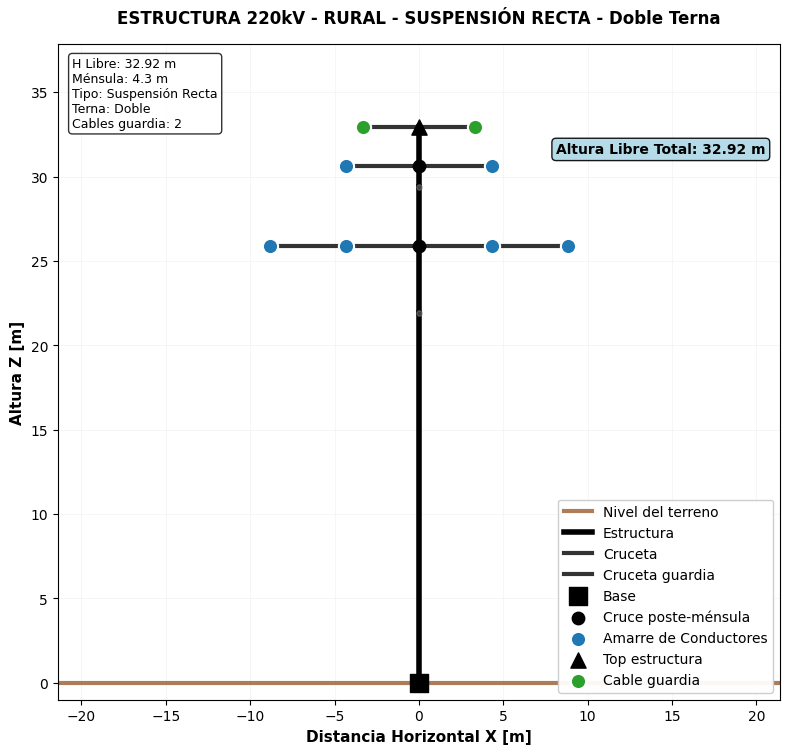

✅ Gráfico de estructura generado

🎨 GENERANDO GRÁFICO DE CABEZAL...


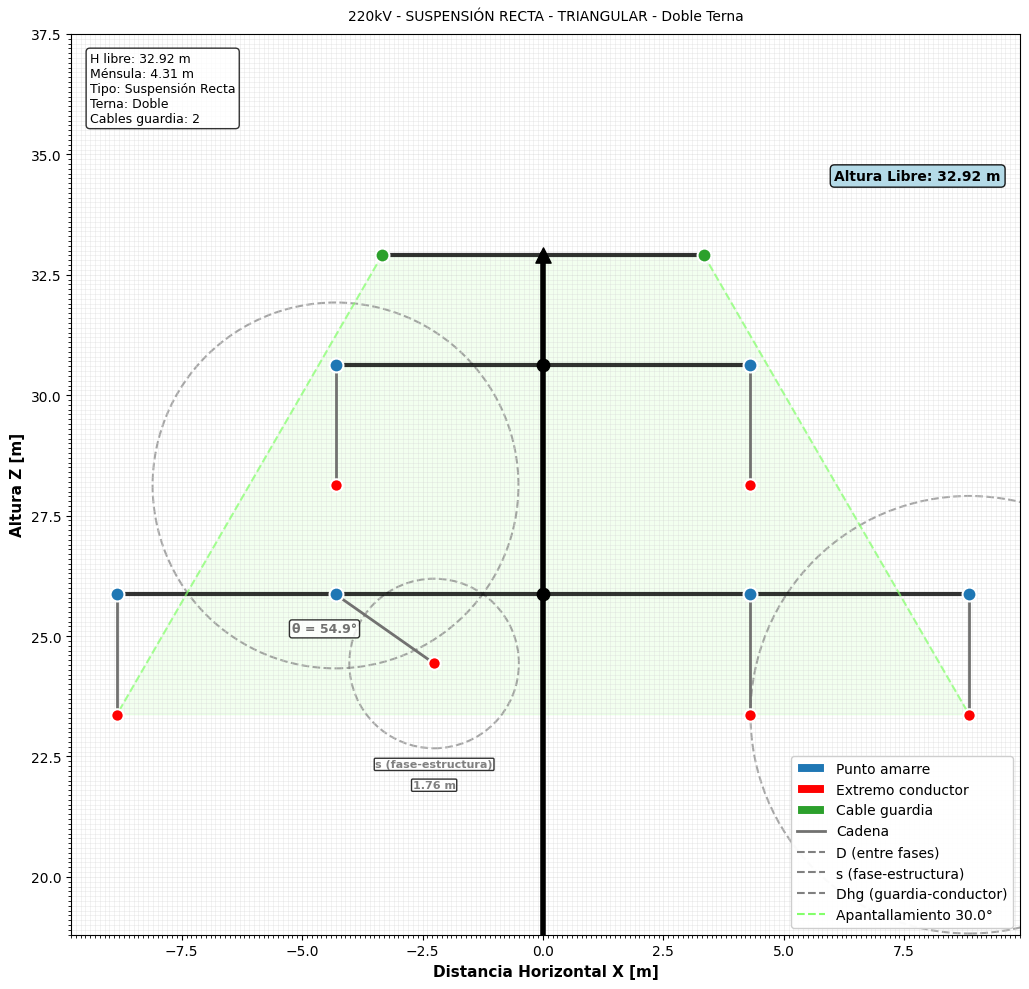

✅ Gráfico de cabezal generado (theta_max: 54.9°)
✅ GRÁFICOS GENERADOS

4. 💾 GUARDANDO RESULTADOS...

💾 GUARDANDO RESULTADOS GEOMÉTRICOS...
✅ Nodos guardados: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/6_suspension_recta_NODOS_POO.csv
✅ Dimensiones guardadas: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/7_suspension_recta_DIMENSIONES_POO.csv
✅ Información guardada: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/9_suspension_recta_INFO_POO.csv
✅ Resultados geométricos guardados en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta

💾 GUARDANDO RESULTADOS MECÁNICOS...
✅ Cargas guardadas: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/8_suspension_recta_CARGAS_POO.csv
✅ Resultados mecánicos guardados en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta
✅ TODOS LOS RESULTADOS GUARDADOS EN: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta

5. 📋 DATOS DISPONIBLES PARA USO POSTERIOR:
   - estructura_geometria: Objeto de geometría completo
   - estructura_mecanica: Objeto de mecánica completo
   - estructura_

In [5]:
### 004: CALCULO DE ESTRUCTURA 

# FLECHAS MÁXIMAS A PARTIR DE LOS RESULTADOS DEL CÁLCULO MECÁNICO
fmax_conductor = max([r["flecha_vertical_m"] for r in resultados_conductor.values()])
fmax_guardia = max([r["flecha_vertical_m"] for r in resultados_guardia.values()])

print(f"Flechas máximas: conductor={fmax_conductor:.2f}m, guardia={fmax_guardia:.2f}m")

# ================= 1. CREAR Y DIMENSIONAR GEOMETRÍA =================
print("\n1. 📐 CREANDO Y DIMENSIONANDO GEOMETRÍA...")

# Crear estructura de geometría 
estructura_geometria = EstructuraAEA_Geometria(
    tipo_estructura=TIPO_ESTRUCTURA,
    tension_nominal=TENSION,
    zona_estructura=Zona_estructura,
    disposicion=DISPOSICION,
    terna=TERNA,
    cant_hg=CANT_HG,
    alpha_quiebre=alpha,
    altura_minima_cable=ALTURA_MINIMA_CABLE,
    long_mensula_min_conductor=LONGITUD_MENSULA_MINIMA_CONDUCTOR,
    long_mensula_min_guardia=LONGITUD_MENSULA_MINIMA_GUARDIA,
    hadd=HADD,
    hadd_entre_amarres=HADD_ENTRE_AMARRES,
    lk=Lk,
    ancho_cruceta=ANCHO_CRUCETA,
    cable_conductor=cable_conductor,
    cable_guardia=cable_guardia,
    peso_estructura=PESTRUCTURA,
    peso_cadena=PCADENA,
    hg_centrado=HG_CENTRADO,
    ang_apantallamiento=ANG_APANTALLAMIENTO,
    hadd_hg=HADD_HG,
    hadd_lmen=HADD_LMEN,
    dist_reposicionar_hg=DIST_REPOSICIONAR_HG,
    ajustar_por_altura_msnm=AJUSTAR_POR_ALTURA_MSNM,  # ← NUEVO
    metodo_altura_msnm=METODO_ALTURA_MSNM,           # ← NUEVO
    altura_msnm=Altura_MSNM                         # ← NUEVO
)

# Dimensionar (usando flechas de cálculos anteriores)
estructura_geometria.dimensionar_unifilar(
    L_vano, 
    fmax_conductor, 
    fmax_guardia,
    dist_reposicionar_hg=DIST_REPOSICIONAR_HG,
    autoajustar_lmenhg=AUTOAJUSTAR_LMENHG  # ← AGREGAR ESTA LINEA
)

# Guardar nodes_key para compatibilidad con código existente
nodes_key = estructura_geometria.obtener_nodes_key()
altura_total = estructura_geometria.dimensiones.get('altura_total', 0)

print(f"\n✅ GEOMETRÍA COMPLETADA: {len(nodes_key)} nodos creados")
print(f"   Altura total: {altura_total:.2f} m")
estructura_geometria.listar_nodos()


# ================= 2. CREAR Y CONFIGURAR MECÁNICA =================
print("\n2. ⚙️ CREANDO Y CONFIGURANDO MECÁNICA...")

estructura_mecanica = EstructuraAEA_Mecanica(estructura_geometria)

# Asignar cargas PASANDO hipotesis_maestro como argumento
estructura_mecanica.asignar_cargas_hipotesis(
    df_cargas_totales, 
    resultados_conductor, 
    resultados_guardia, 
    L_vano, 
    hipotesis_maestro,  # ← Viene del notebook
    t_hielo  # 
)

# Generar DataFrame de cargas
df_cargas_poo = estructura_mecanica.generar_dataframe_cargas()

# Guardar cargas_key para compatibilidad con código existente
cargas_key = estructura_mecanica.cargas_key

print(f"✅ MECÁNICA COMPLETADA: {len(cargas_key)} hipótesis procesadas")

# ================= 3. CREAR Y GENERAR GRÁFICOS =================
print("\n3. 🎨 CREANDO Y GENERANDO GRÁFICOS...")

estructura_graficos = EstructuraAEA_Graficos(estructura_geometria, estructura_mecanica)

# Graficar estructura completa
estructura_graficos.graficar_estructura(
    zoom_cabezal=ZOOM_CABEZAL, 
    titulo_reemplazo=TITULO_REEMPLAZO
)

# Graficar detalle del cabezal
estructura_graficos.graficar_cabezal(
    zoom_cabezal=ZOOM_CABEZAL*1.5, 
    titulo_reemplazo=TITULO_REEMPLAZO
)

print(f"✅ GRÁFICOS GENERADOS")

# ================= 4. GUARDAR RESULTADOS =================
print("\n4. 💾 GUARDANDO RESULTADOS...")

# Guardar resultados geométricos
estructura_geometria.guardar_resultados_geometria(folder)

# Guardar resultados mecánicos
estructura_mecanica.guardar_resultados_mecanica(folder)

print(f"✅ TODOS LOS RESULTADOS GUARDADOS EN: {folder}")

# ================= 5. DATOS PARA USO POSTERIOR =================
print("\n5. 📋 DATOS DISPONIBLES PARA USO POSTERIOR:")

# Los siguientes datos están disponibles para celdas posteriores:
print(f"   - estructura_geometria: Objeto de geometría completo")
print(f"   - estructura_mecanica: Objeto de mecánica completo")
print(f"   - estructura_graficos: Objeto de gráficos completo")
print(f"   - nodes_key: {len(nodes_key)} nodos (dict)")
print(f"   - cargas_key: {len(cargas_key)} hipótesis (dict)")
print(f"   - df_cargas_poo: DataFrame de cargas ({df_cargas_poo.shape[0]} filas, {df_cargas_poo.shape[1]} columnas)")
print(f"   - altura_total: {altura_total:.2f} m")

print(f"\n✅ ESTRUCTURA COMPLETAMENTE CALCULADA")


🔧 REACCIONES Y TIROS EN CIMA - NUEVA ESTRUCTURA

1. 📊 CALCULANDO REACCIONES Y TIROS EN CIMA...
   Nodo de apoyo: BASE
   Nodo de cima: TOP

🔧 CÁLCULO DE REACCIONES Y TIROS EN CIMA
   Apoyo: BASE, Cima: TOP
   Altura efectiva: 32.92 m
✅ Cálculo completado: 9 hipótesis procesadas

2. 📋 TABLA RESUMEN DE REACCIONES Y TIROS

TABLA RESUMEN - REACCIONES Y TIROS EQUIVALENTES EN LA CIMA
+-------------+------------+------------+------------+--------------+--------------+--------------+----------------+----------------+------------------+--------------+
| Hipótesis   |   Fx [daN] |   Fy [daN] |   Fz [daN] |   Mx [daN·m] |   My [daN·m] |   Mz [daN·m] |   Tiro_X [daN] |   Tiro_Y [daN] |   Tiro_Res [daN] |   Ángulo [°] |
+=============+============+============+============+==============+==============+==============+================+================+==================+==============+
| A0          |        0   |        0   |    -4198.6 |          0   |         -0   |          0   |           -0  

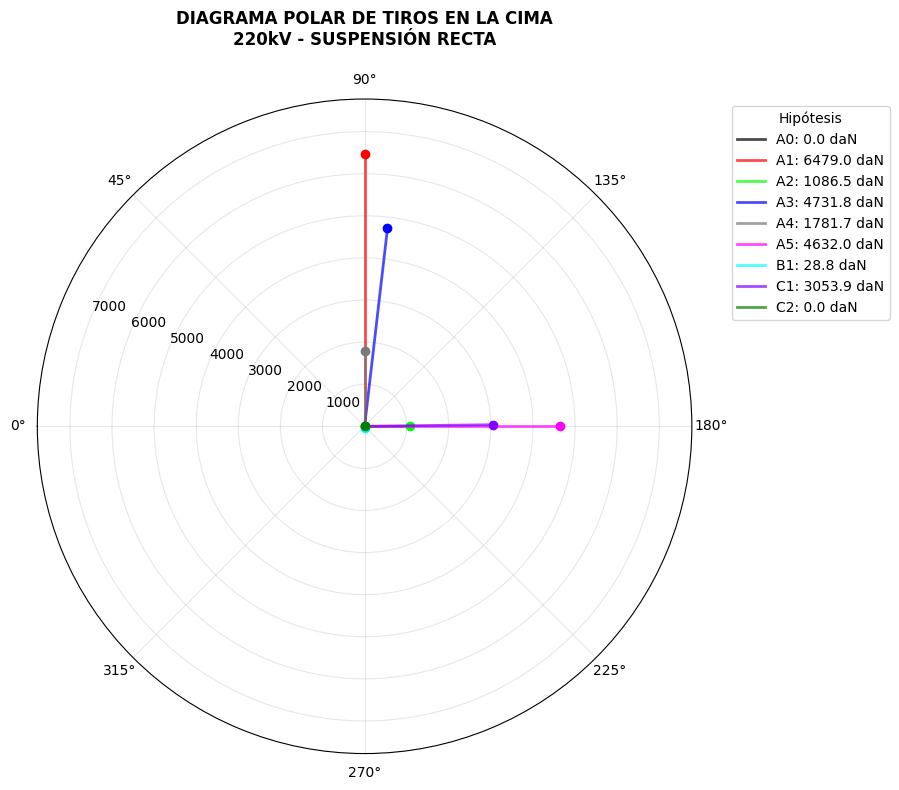

✅ Diagrama polar generado

📊 GENERANDO DIAGRAMA DE BARRAS DE TIROS...


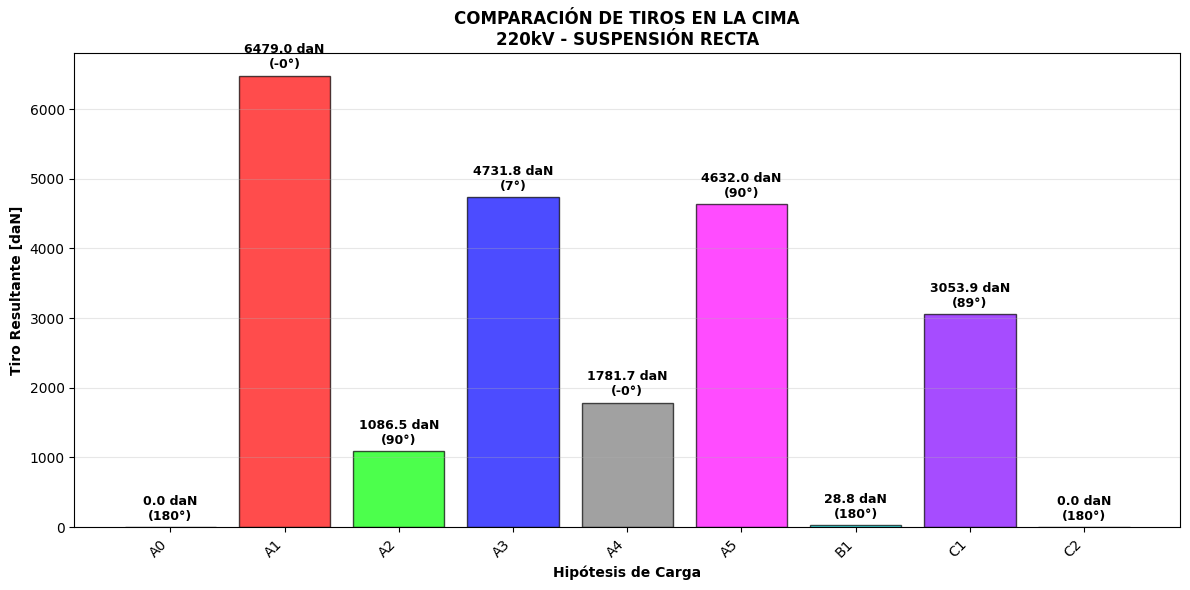

✅ Diagrama de barras generado

4. 💾 GUARDANDO RESULTADOS DE REACCIONES...

💾 GUARDANDO RESULTADOS MECÁNICOS...
✅ Cargas guardadas: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/8_suspension_recta_CARGAS_POO.csv
✅ Reacciones guardadas: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta/10_suspension_recta_REACCIONES_POO.csv
✅ Resultados mecánicos guardados en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta

5. 📊 DATOS DISPONIBLES PARA ANÁLISIS:
   - DataFrame de reacciones: estructura_mecanica.df_reacciones
   - Diccionario de resultados: estructura_mecanica.resultados_reacciones
   - Resultados guardados en: 2x220 DTT SAN JORGE PRUEBAS/suspension_recta

📈 ESTADÍSTICAS DE TIROS EN CIMA:
   - Máximo: 6479.0 daN
   - Mínimo: 0.0 daN
   - Promedio: 2421.5 daN
   - Rango: 6479.0 daN

✅ ANÁLISIS DE REACCIONES COMPLETADO


In [6]:
### 005: REACCIONES Y TIRO EN CIMA

# Nota: Esta celda asume que ya se ejecutó la celda 004 y que existen:
#   - estructura_geometria
#   - estructura_mecanica
#   - estructura_graficos

def main():
    print("\n🔧 REACCIONES Y TIROS EN CIMA - NUEVA ESTRUCTURA")
    print("=" * 80)
    
    # Verificar que los objetos existen
    if 'estructura_mecanica' not in globals():
        print("❌ ERROR: No se encontró 'estructura_mecanica'")
        print("   Ejecutar primero la celda 004 (Cálculo de estructura)")
        return
    
    if 'estructura_graficos' not in globals():
        print("❌ ERROR: No se encontró 'estructura_graficos'")
        print("   Ejecutar primero la celda 004 (Cálculo de estructura)")
        return
    
    # 1. CALCULAR REACCIONES Y TIROS EN CIMA
    print("\n1. 📊 CALCULANDO REACCIONES Y TIROS EN CIMA...")
    
    # Determinar nodo cima apropiado
    nodo_cima = None
    nodes_key = estructura_geometria.nodes_key
    
    if "TOP" in nodes_key:
        nodo_cima = "TOP"
    elif "HG1" in nodes_key:
        nodo_cima = "HG1"
    else:
        # Buscar el nodo más alto
        nodo_cima = max(nodes_key.items(), key=lambda x: x[1][2])[0]
    
    print(f"   Nodo de apoyo: BASE")
    print(f"   Nodo de cima: {nodo_cima}")
    
    df_reacciones = estructura_mecanica.calcular_reacciones_tiros_cima(
        nodo_apoyo="BASE", 
        nodo_cima=nodo_cima
    )
    
    # 2. IMPRIMIR TABLA RESUMEN
    print("\n2. 📋 TABLA RESUMEN DE REACCIONES Y TIROS")
    estructura_mecanica.imprimir_reacciones_tiros(mostrar_c2=True)
    
    # 3. GENERAR DIAGRAMAS
    print("\n3. 🎨 GENERANDO DIAGRAMAS DE ANÁLISIS...")
    
    # Diagrama polar
    estructura_graficos.diagrama_polar_tiros()
    
    # Diagrama de barras
    estructura_graficos.diagrama_barras_tiros()
    
    # 4. GUARDAR RESULTADOS DE REACCIONES
    print("\n4. 💾 GUARDANDO RESULTADOS DE REACCIONES...")
    estructura_mecanica.guardar_resultados_mecanica(folder)
    
    # 5. ACCEDER A LOS DATOS
    print("\n5. 📊 DATOS DISPONIBLES PARA ANÁLISIS:")
    print(f"   - DataFrame de reacciones: estructura_mecanica.df_reacciones")
    print(f"   - Diccionario de resultados: estructura_mecanica.resultados_reacciones")
    print(f"   - Resultados guardados en: {folder}")
    
    # Mostrar estadísticas clave
    if estructura_mecanica.df_reacciones is not None:
        max_tiro = estructura_mecanica.df_reacciones['Tiro_resultante_daN'].max()
        min_tiro = estructura_mecanica.df_reacciones['Tiro_resultante_daN'].min()
        avg_tiro = estructura_mecanica.df_reacciones['Tiro_resultante_daN'].mean()
        
        print(f"\n📈 ESTADÍSTICAS DE TIROS EN CIMA:")
        print(f"   - Máximo: {max_tiro:.1f} daN")
        print(f"   - Mínimo: {min_tiro:.1f} daN")
        print(f"   - Promedio: {avg_tiro:.1f} daN")
        print(f"   - Rango: {max_tiro - min_tiro:.1f} daN")
    
    print(f"\n✅ ANÁLISIS DE REACCIONES COMPLETADO")


if __name__ == "__main__":
    # Verificar que estamos en un entorno interactivo (Jupyter Notebook)
    try:
        get_ipython()
        main()
    except NameError:
        # Si no estamos en Jupyter, ejecutar directamente
        main()

In [7]:
### 006: POSTES DE HORMIGÓN
postes = PostesHormigon()
resultados_postes = postes.calcular_seleccion_postes(
    geometria=estructura_geometria,
    mecanica=estructura_mecanica,
    FORZAR_N_POSTES=FORZAR_N_POSTES,
    FORZAR_ORIENTACION=FORZAR_ORIENTACION,
    ANCHO_CRUCETA=ANCHO_CRUCETA,
    PRIORIDAD_DIMENSIONADO=PRIORIDAD_DIMENSIONADO
)
postes.imprimir_desarrollo_seleccion_postes()

🔧 SELECCIÓN DE POSTE - MÉTODO LRFD AEA 95301-2007
⚠️  Ajustando empotramiento: 3.58m < 3.65m (10% de 36.5m)
✅ Nuevo empotramiento: 4.08m, Nueva longitud total: 37.0m
🔧 SELECCIÓN DE POSTE - MÉTODO LRFD AEA 95301-2007

📐 DIMENSIONADO GEOMÉTRICO DEL POSTE
Prioridad de dimensionado: ALTURA LIBRE
Altura libre requerida (Hl): 32.92 m
Empotramiento mínimo: 3.29 m
Longitud total mínima: 36.21 m
Longitud total comercial (Ht): 37.0 m
Empotramiento final (He): 4.08 m

🔍 IDENTIFICACIÓN DE HIPÓTESIS CRÍTICAS
  Estado de mayor solicitación: A1 (Fr = 6479.0 daN en Hl)
  Servicio: A0 (Fr = 0.0 daN en Hl) (No hay componente angular)

📏 AJUSTE DE RESISTENCIA PARA ALTURA TOTAL
Se ajustan las hipótesis críticas a la altura libre sumada al empotramiento, de la siguiente manera:
Frt = Frl × Hl/Ht

HIPÓTESIS CRÍTICAS, TIROS AJUSTADOS A ALTURA TOTAL:
  Estado de mayor solicitación: A1 (Frt = 5763.7 daN en Ht)
  Servicio: A0 (Frt = 0.0 daN en Ht) (No hay componente angular)

🛡️ DETERMINACIÓN DE LA RESISTENCIA 